In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings; warnings.filterwarnings('ignore')


In [3]:
pip install mlxtend

In [4]:
df=pd.read_csv('/content/fashion_products.csv')

In [5]:
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,75,144,Shoes,Adidas,Kids' Fashion,57,1.000967,Blue,M
1,31,560,Dress,Adidas,Women's Fashion,99,1.002064,Red,XL
2,71,589,T-shirt,Adidas,Women's Fashion,99,1.024250,Red,L
3,54,179,Shoes,Adidas,Kids' Fashion,53,1.028323,Blue,M
4,80,601,Dress,Adidas,Women's Fashion,44,1.034707,White,L


In [6]:
df.dtypes

User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

In [7]:
cat_cols=df.select_dtypes(include=object).columns

In [8]:
cat_cols

Index(['Product Name', 'Brand', 'Category', 'Color', 'Size'], dtype='object')

In [9]:
df[cat_cols]=df[cat_cols].astype('category')

In [10]:
num_cols=df.columns.difference(cat_cols)

In [11]:
df.dtypes

User ID            int64
Product ID         int64
Product Name    category
Brand           category
Category        category
Price              int64
Rating           float64
Color           category
Size            category
dtype: object

 2. Product Recommendation: Build a recommendation system to suggest products to customers based on their past interactions, ratings, and preferences.

In [12]:
# Create a user-item interaction matrix (replace this with your actual matrix)
interaction_matrix = pd.pivot_table(df, values='Rating', index='Product Name', columns='Brand', fill_value=0)
interaction_matrix

Brand,Adidas,Gucci,H&M,Nike,Zara
Product Name,,,,,
Dress,2.922770,3.309225,2.795876,3.055315,3.103453
Jeans,2.940334,3.131762,2.964701,2.729210,3.135864
Shoes,2.576006,3.354003,3.102472,2.982125,2.569856
Sweater,3.685384,2.964846,3.008260,2.954748,3.186871
T-shirt,2.801723,3.043445,3.127210,2.753413,3.127496


In [13]:
# Calculate the cosine similarity between products
similarities = cosine_similarity(interaction_matrix.T)
similarities

array([[1.        , 0.98689367, 0.99049904, 0.99194752, 0.99537066],
       [0.98689367, 1.        , 0.99755673, 0.99897089, 0.99345704],
       [0.99049904, 0.99755673, 1.        , 0.99740675, 0.99522778],
       [0.99194752, 0.99897089, 0.99740675, 1.        , 0.99499814],
       [0.99537066, 0.99345704, 0.99522778, 0.99499814, 1.        ]])

In [14]:
# Create a dictionary to map product names to indices
product_indices = {product: i for i, product in enumerate(interaction_matrix.index)}

# Function to recommend products based on similarity
def recommend_products(Product_Name, num_recommendations=5):
    product_index = product_indices[Product_Name]
    similar_products = similarities[product_index]
    recommended_indices = similar_products.argsort()[-num_recommendations-1:-1][::-1]
    recommended_products = [interaction_matrix.index[i] for i in recommended_indices]
    return recommended_products

In [15]:
# Example usage
product_to_recommend = "Dress"
recommended_products = recommend_products(product_to_recommend)
print(f"Recommended products for {product_to_recommend}:")
for product in recommended_products:
    print(product)

Recommended products for Dress:
T-shirt
Sweater
Shoes
Jeans


#Preprocessing

Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
df[num_cols]=pd.DataFrame(sc.fit_transform(df[num_cols]),columns=df[num_cols].columns)

In [19]:
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,0.854489,-1.234953,Shoes,Adidas,Kids' Fashion,0.046235,-1.728399,Blue,M
1,-0.675046,0.206114,Dress,Adidas,Women's Fashion,1.644494,-1.727448,Red,XL
2,0.715440,0.306573,T-shirt,Adidas,Women's Fashion,1.644494,-1.708199,Red,L
3,0.124483,-1.113709,Shoes,Adidas,Kids' Fashion,-0.105980,-1.704665,Blue,M
4,1.028299,0.348142,Dress,Adidas,Women's Fashion,-0.448464,-1.699126,White,L


Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe=OneHotEncoder()

In [22]:
df_cat=df[cat_cols]

In [23]:
df_cat=pd.DataFrame(ohe.fit_transform(df_cat).todense(),columns=ohe.get_feature_names_out())

In [24]:
df = pd.concat([df, df_cat], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

In [25]:
df.head()

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,0.854489,-1.234953,0.046235,-1.728399,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.675046,0.206114,1.644494,-1.727448,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.715440,0.306573,1.644494,-1.708199,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.124483,-1.113709,-0.105980,-1.704665,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.028299,0.348142,-0.448464,-1.699126,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


1.	Customer Segmentation: Use clustering algorithms to segment customers based on their product preferences, ratings, and interactions. This can help identify different customer groups with similar behaviors and needs

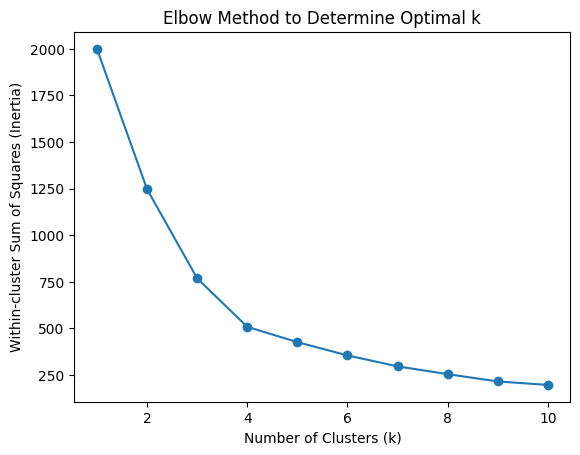

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/fashion_products.csv')

# Select relevant features for clustering
X = df[['Product ID', 'Rating']]

# Data Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# Based on the elbow curve, determine the optimal k (number of clusters)

# Apply k-means clustering with the chosen k value
k = 3  # You can choose the value based on the elbow method or domain knowledge
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


3.	Brand Analysis: Analyze the performance of different brands based on product ratings, prices, and customer feedback. Identify popular brands and customer sentiments toward them

In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/fashion_products.csv")

# Calculate average rating and price for each brand
brand_stats = data.groupby("Brand").agg({"Rating": "mean", "Price": "mean"})

# Count the number of products for each brand
brand_stats["num_products"] = data["Brand"].value_counts()

# Sort brands by average rating
brand_stats = brand_stats.sort_values(by="Rating", ascending=False)

# Print brand analysis
print("Brand Analysis:")
print(brand_stats)

# Sentiment analysis
#positive_sentiment_brands = brand_stats[brand_stats["Rating"] >= 4.0].index
#negative_sentiment_brands = brand_stats[brand_stats["Rating"] < 4.0].index

#print("\nPopular Brands with Positive Sentiment:")
#print(positive_sentiment_brands)

#print("\nBrands with Negative Sentiment:")
#print(negative_sentiment_brands)


Brand Analysis:
          Rating      Price  num_products
Brand                                    
Gucci   3.162277  55.429319           191
Zara    3.001594  54.748768           203
H&M     2.996309  57.567010           194
Adidas  2.942720  53.515152           198
Nike    2.877917  57.570093           214


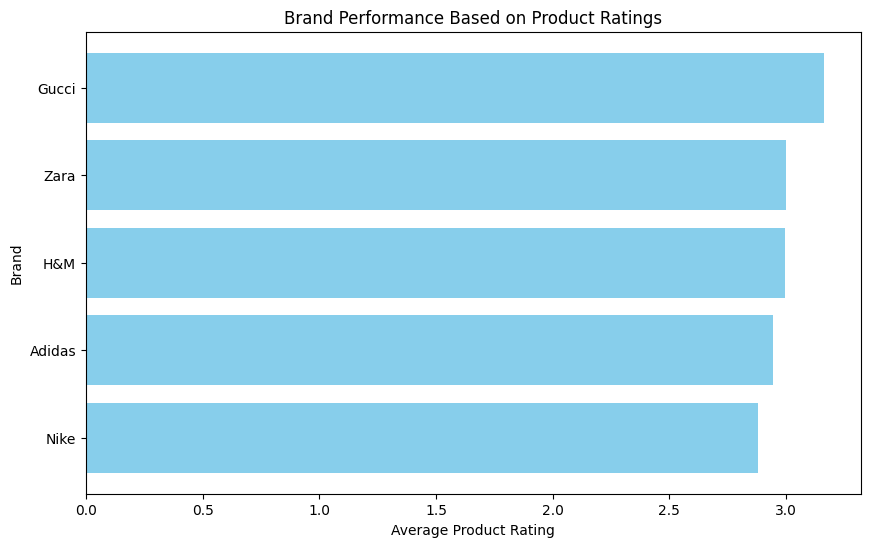

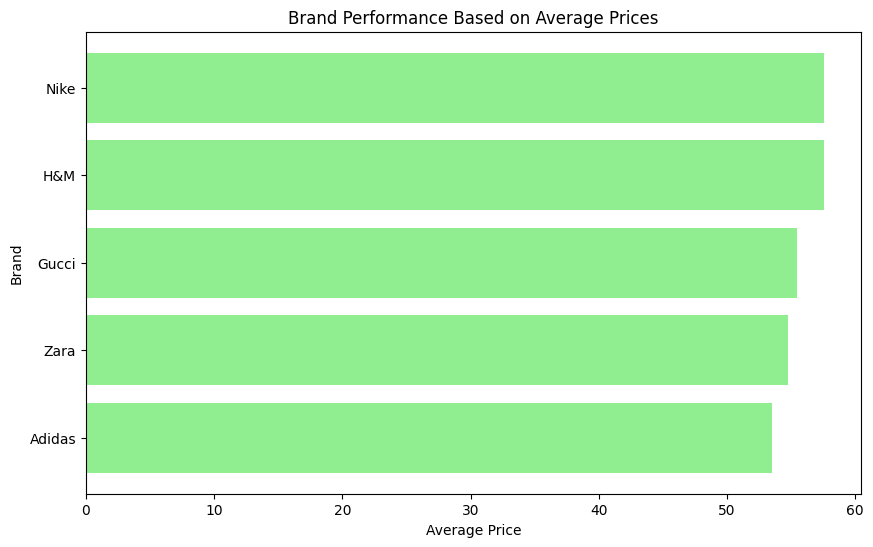

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/fashion_products.csv')

# Assuming columns 'brand', 'product_rating', 'price' in the dataset

# Group data by brand and calculate mean product rating and average price
brand_performance = data.groupby('Brand')[['Rating', 'Price']].mean().reset_index()

# Sort brands by average product rating
brand_performance = brand_performance.sort_values(by='Rating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(brand_performance['Brand'], brand_performance['Rating'], color='skyblue')
plt.xlabel('Average Product Rating')
plt.ylabel('Brand')
plt.title('Brand Performance Based on Product Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating on top
plt.show()

# Sort brands by average price
brand_performance = brand_performance.sort_values(by='Price', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(brand_performance['Brand'], brand_performance['Price'], color='lightgreen')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.title('Brand Performance Based on Average Prices')
plt.gca().invert_yaxis()
plt.show()

#Based on Product Ratings "Gucci" Brand has high brand performance based on the ratings given by the people on the product
#Based on Average Prices "Nike" and "H&M" Brands has average prices



4.	Category Analysis: Explore the distribution of products across different categories and analyze which categories are most popular among customers.

In [30]:

# Count the number of products in each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Products']

# Create an interactive bar plot using Plotly
fig = px.bar(category_counts, x='Category', y='Number of Products', title='Distribution of Products Across Categories')
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

#Distribution of Products in "Kids Category" is the most popular among the three categories

5.	Price Analysis: Investigate the relationship between product prices and customer ratings or sales to understand the impact of pricing on product demand

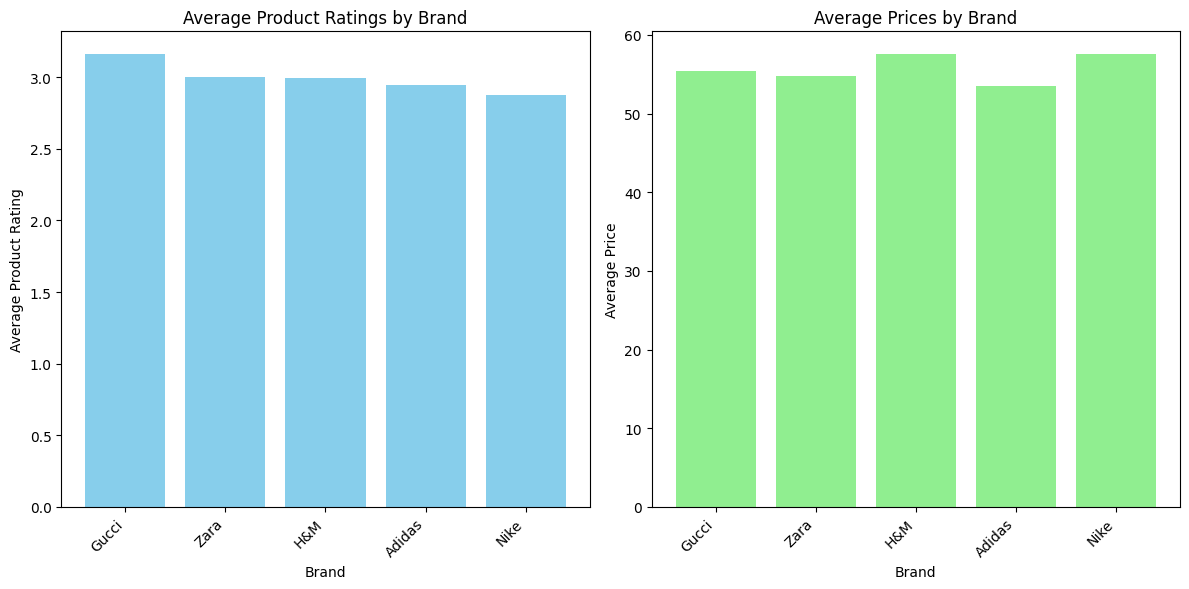

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/fashion_products.csv')

# Assuming columns 'brand', 'product_rating', 'price' in the dataset

# Group data by brand and calculate mean product rating and average price
brand_performance = data.groupby('Brand')[['Rating', 'Price']].mean().reset_index()

# Sort brands by average product rating
brand_performance = brand_performance.sort_values(by='Rating', ascending=False)

# Create a bar graph to show the relationship between product prices, ratings, and brands
plt.figure(figsize=(12, 6))

# Plotting average product ratings
plt.subplot(1, 2, 1)
plt.bar(brand_performance['Brand'], brand_performance['Rating'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Product Rating')
plt.title('Average Product Ratings by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plotting average prices
plt.subplot(1, 2, 2)
plt.bar(brand_performance['Brand'], brand_performance['Price'], color='lightgreen')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Prices by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#In Average products ratings by Brand "Gucci " brand has the average product ratings among the given five brands
# In Average Prices by Brand "H&M" and "Nike" Brands has the average prices of the products among the given five brands


7.	Customer Lifetime Value (CLV): Calculate the CLV for different customer segments to understand the long-term value of each customer group.

In [32]:
# Group by user and segment, then calculate average CLV
user_segment_clv = df.groupby(['User ID', 'Cluster'])['Price'].sum().reset_index()
user_segment_clv.rename(columns={'Price': 'Total_Spend'}, inplace=True)

# Calculate average CLV per segment
segment_clv = user_segment_clv.groupby('Cluster')['Total_Spend'].mean()

# Display segment-level CLV
print(segment_clv)

Cluster
0    185.093750
1    214.346939
2    179.052632
Name: Total_Spend, dtype: float64


8.Market Basket Analysis: Identify associations and patterns between products frequently
purchased together, which can be useful for cross-selling and product bundling strategies.

In [35]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
data = pd.read_csv('/content/fashion_products.csv')

# Convert data to a format suitable for Market Basket Analysis
# We assume each transaction corresponds to a unique 'User ID' and contains 'Product Name'
basket = data.groupby(['User ID', 'Product Name'])['Product Name'].count().unstack().reset_index().fillna(0).set_index('User ID')

# Convert count values to binary (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the resulting association rules
print(rules)

# People by the User Id's who have bought the antecedents(things which they bought) has a high chances of buying consequents(high chances of buying the things given in consequents) given by the support (means that there are the high chances of buying the things given in the consequents)

          antecedents                       consequents  antecedent support  \
0             (Jeans)                           (Dress)                0.91   
1             (Dress)                           (Jeans)                0.79   
2           (Sweater)                           (Dress)                0.77   
3             (Dress)                         (Sweater)                0.79   
4             (Jeans)                           (Shoes)                0.91   
..                ...                               ...                 ...   
101  (Sweater, Jeans)           (Dress, T-shirt, Shoes)                0.71   
102  (Sweater, Dress)           (Jeans, T-shirt, Shoes)                0.61   
103           (Jeans)  (Sweater, Dress, T-shirt, Shoes)                0.91   
104           (Dress)  (Sweater, Jeans, T-shirt, Shoes)                0.79   
105         (Sweater)    (Jeans, Dress, T-shirt, Shoes)                0.77   

     consequent support  support  confidence      l

9. Customer Churn Prediction: Predict customer churn (customers likely to stop purchasing)
based on their interactions and historical behavior.

In [36]:
# Assuming your dataset has columns like 'customer_id', 'brand', 'rating', and 'churn'
# Filter data for the specific brand
specific_brand = 'Gucci'
brand_data = df[df['Brand'] == specific_brand]

# Filter for customers with low ratings (you can adjust the threshold)
low_rating_threshold = 3
low_rating_customers = brand_data[brand_data['Rating'] < low_rating_threshold]

# Create a binary churn column (1 for churned customers, 0 otherwise)
low_rating_customers['churn'] = 1
print("Low Brand:")
print(low_rating_customers[['Brand', 'Rating', 'Price']])

# according to the brands the low ratings of the products has been displayed (the ratings given by the Users when they bought the products)

Low Brand:
     Brand    Rating  Price
198  Gucci  1.005087     16
199  Gucci  1.050046     69
200  Gucci  1.123240     38
201  Gucci  1.184450     18
202  Gucci  1.202303     17
..     ...       ...    ...
276  Gucci  2.923982     34
277  Gucci  2.954603     21
278  Gucci  2.958505     98
279  Gucci  2.970809     73
280  Gucci  2.983803     35

[83 rows x 3 columns]



Conclusion
---
I have imported the libraries which are useful for my project(libaries such as  pandas as pd, scikit,plotly and matplotlib(visulation), mxltend(for using market basket analysis).Afterthat i did datapreprocessing and after datapreprocessing i did feature engineering and in clustering i have used K clustering, for the better understanding the concept and the curve with elbow method after the finding the brand analysis and after that by  the analysis of categories and analysis of the average prices and product rating based in the brand and using Market Basket Anlysis we have predicted that the customers having the high chances of buying recommended products and the brands which has the low rating products that users have less chances of buying the things in the brands  

